# Bibliotheken importieren

In [54]:
import pymysql
pymysql.install_as_MySQLdb()

# Pfad zum Projektverzeichnis hinzufügen, Verbindung zur Datenbank herstellen, Daten laden


In [55]:
# Pfad zum Projektverzeichnis hinzufügen
sys.path.append(os.path.abspath(".."))

# Verbindung zur Datenbank herstellen
from database.db_connection import DatabaseConnector

# Fehlerbehandlung für Datenbankverbindung
try:
    # Datenbankverbindung
    db_connector = DatabaseConnector()
    engine = db_connector.get_engine()
except Exception as e:
    print(f"Fehler bei der Datenbankverbindung: {e}")
    sys.exit(1)  # Programm abbrechen bei Verbindungsfehler

# Daten laden
try:
    forecast_df = pd.read_sql("SELECT * FROM historical_forecast;", engine)
    weather_df = pd.read_sql("SELECT * FROM historical_weather;", engine)
except Exception as e:
    print(f"Fehler beim Laden der Daten: {e}")
    sys.exit(1)  # Programm abbrechen bei Fehler

# Grafische EDA
print("Starte grafische Analyse...")

Starte grafische Analyse...


# 1. Histogramme: Verteilung der Temperatur und Windgeschwindigkeit

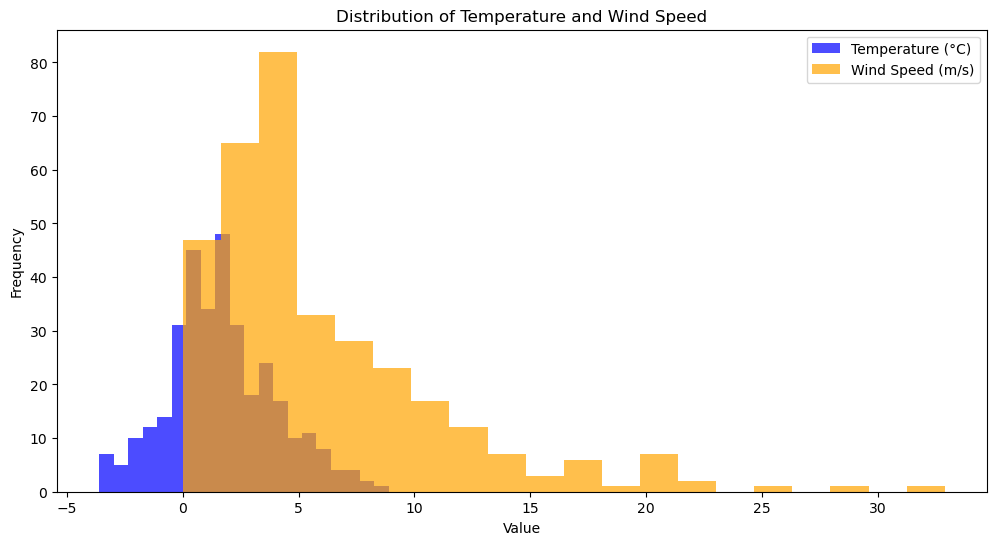

In [56]:
plt.figure(figsize=(12, 6))
plt.hist(weather_df['temperature_2m'], bins=20, alpha=0.7, label='Temperature (°C)', color='blue')
plt.hist(weather_df['wind_speed_10m'], bins=20, alpha=0.7, label='Wind Speed (m/s)', color='orange')
plt.title("Distribution of Temperature and Wind Speed")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Boxplot: Comparison of temperature distribution by month

C:\Users\fdrmi\AppData\Local\Temp\ipykernel_24844\2582838769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df, x='month', y='temperature_2m', palette='coolwarm')


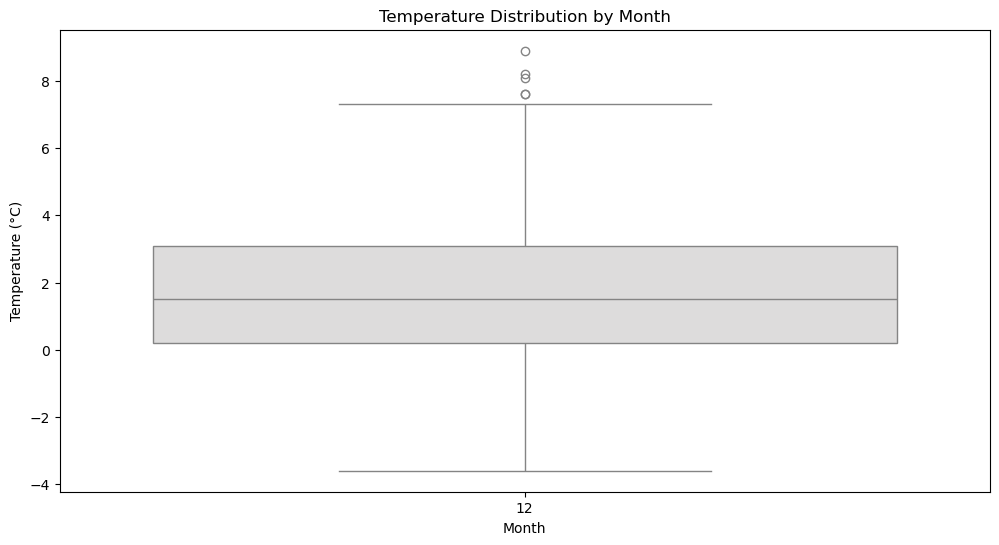

In [57]:
weather_df['month'] = weather_df['datetime'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_df, x='month', y='temperature_2m', palette='coolwarm')
plt.title("Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

# 3. Scatterplot: Relationship between temperature and relative humidity

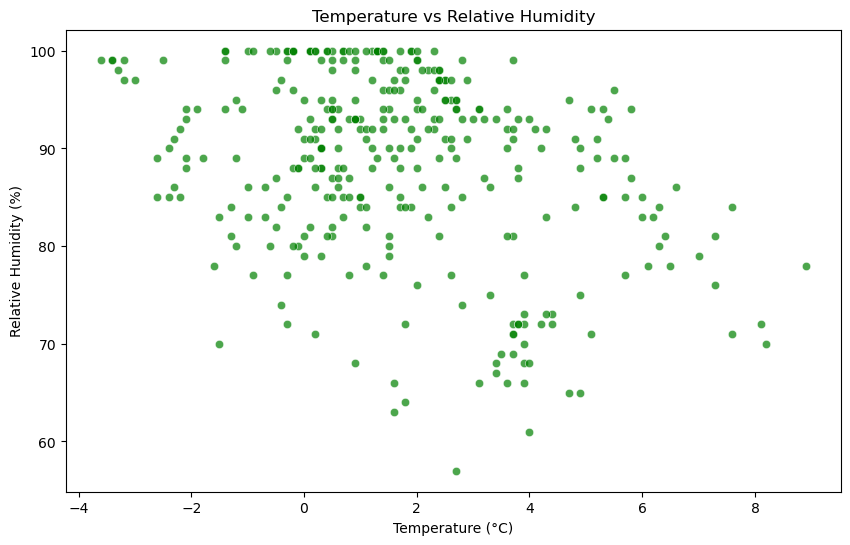

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='temperature_2m', y='relative_humidity_2m', alpha=0.7, color='green')
plt.title("Temperature vs Relative Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.show()


# 4. Time series analysis: Temperature trends over time

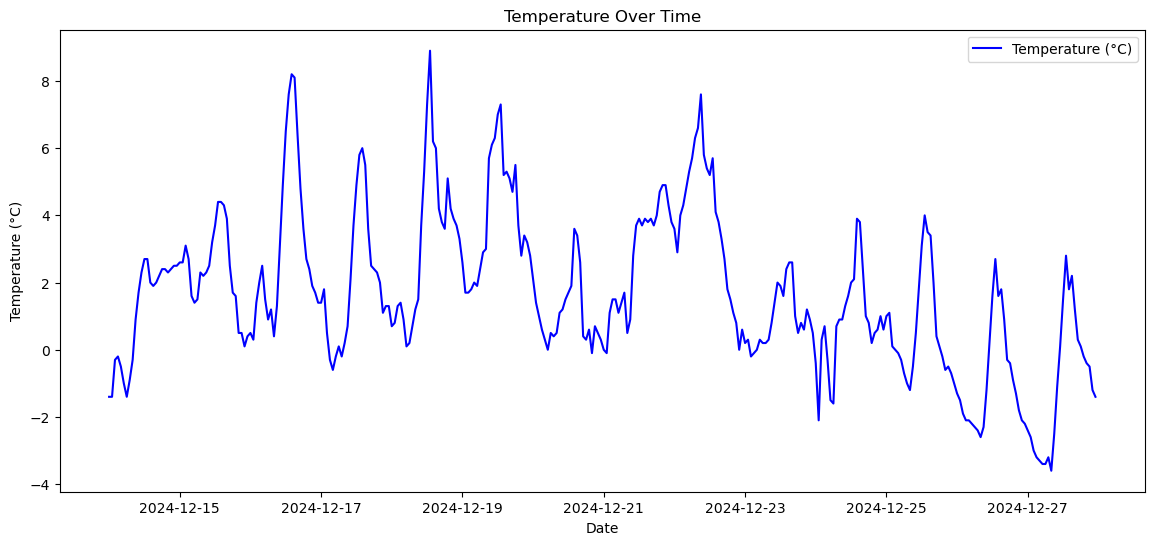

In [59]:
plt.figure(figsize=(14, 6))
plt.plot(weather_df['datetime'], weather_df['temperature_2m'], label='Temperature (°C)', color='blue')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# 5. Geographical data visualization (if available) -> see eda_graphical:additional.ipynb

In [60]:
if 'latitude' in weather_df.columns and 'longitude' in weather_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=weather_df, x='longitude', y='latitude', hue='temperature_2m', palette='coolwarm', alpha=0.7)
    plt.title("Geographical Distribution of Temperature")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Temperature (°C)")
    plt.show()
else:
    print("No geographical data available for plotting.")

print("Graphical EDA completed.")

No geographical data available for plotting.
Graphical EDA completed.
